In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Converter os valores não NaN para float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power


In [4]:
# Remover linhas com NaN na coluna 'max_power'
df = df.dropna(subset=['max_power'])
print(df['max_power'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13867, dtype: float64


In [5]:
# Change the data types of multiple columns
df = df.astype({
    
    'max_power': float,
    
})

In [6]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power            float64
seats                float64
mileage               object
body_type             object
city                  object
resale_price_Lakh    float64
dtype: object


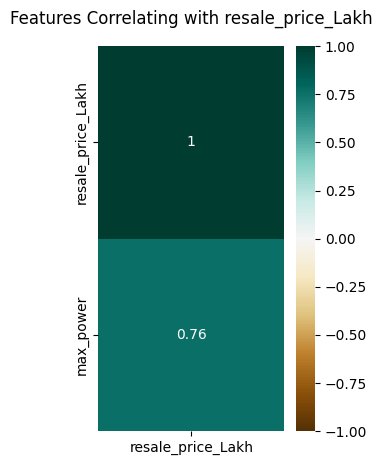

In [7]:
#correlation  

# Select columns
columns_of_interest = ['max_power', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()